# Import requirements

In [ ]:
import pandas as pd
import numpy as np
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import linear_model
from matplotlib import pyplot as plt

# Prepare data


## Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive


Mounted at /content/drive


## Read dataset file

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/immo_data.csv',
                   usecols=['baseRent', 'serviceCharge', 'heatingType', 'telekomUploadSpeed'])
data.head()


,serviceCharge,heatingType,telekomUploadSpeed,baseRent
0,245.00,central_heating,10.0,595.0
1,134.00,self_contained_central_heating,10.0,800.0
2,255.00,floor_heating,2.4,965.0
3,58.15,district_heating,40.0,343.0
4,138.00,self_contained_central_heating,NaN,765.0


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/immo_data.csv',
                   usecols=['regio1', 'serviceCharge', 'pricetrend', 'geo_krs',
                            'totalRent', 'telekomUploadSpeed',
                            'baseRent', 'livingSpace', 'regio2', 'regio3', 'floor',
                            'noRooms', 'lift', 'thermalChar', 'geo_bln',
                            'noParkSpaces', 'firingTypes', 'hasKitchen', 'heatingType'])
data2.head()

,regio1,serviceCharge,heatingType,pricetrend,telekomUploadSpeed,totalRent,noParkSpaces,firingTypes,hasKitchen,geo_bln,baseRent,livingSpace,geo_krs,lift,noRooms,thermalChar,floor,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,4.62,10.0,840.0,1.0,oil,False,Nordrhein_Westfalen,595.0,86.00,Dortmund,False,4.0,181.4,1.0,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,3.47,10.0,NaN,2.0,gas,False,Rheinland_Pfalz,800.0,89.00,Rhein_Pfalz_Kreis,False,3.0,NaN,NaN,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,2.72,2.4,1300.0,1.0,NaN,False,Sachsen,965.0,83.80,Dresden,True,3.0,NaN,3.0,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,1.53,40.0,NaN,NaN,district_heating,False,Sachsen,343.0,58.15,Mittelsachsen_Kreis,False,3.0,86.0,3.0,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,2.46,NaN,903.0,NaN,gas,False,Bremen,765.0,84.97,Bremen,False,3.0,188.9,1.0,Bremen,Neu_Schwachhausen


In [ ]:
data.info

<bound method DataFrame.info of                      regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  telekomH

## Handle missing values

In [ ]:
def fill_null_with_mean(df, columns):
  for column in columns:
    mean = df[column].mean()
    df[column] = df[column].fillna(mean)

def fill_null_with_mode(df, columns):
  for column in columns:
    mode = df.mode()[column][0]
    print(mode)
    df[column] = df[column].fillna(mode)



In [ ]:
fill_null_with_mean(data2, ['thermalChar', 'telekomUploadSpeed'])
fill_null_with_mode(data2, ['firingTypes', 'heatingType'])

data2['floor'] = data2['floor'].fillna(1.0)
data2['noParkSpaces'] = data2['noParkSpaces'].fillna(0.0)

print(data2.isnull().sum())


regio1                    0
serviceCharge          6909
heatingType               0
pricetrend             1832
telekomUploadSpeed        0
totalRent             40517
noParkSpaces              0
firingTypes               0
hasKitchen                0
geo_bln                   0
baseRent                  0
livingSpace               0
geo_krs                   0
lift                      0
noRooms                   0
thermalChar               0
floor                     0
regio2                    0
regio3                    0
dtype: int64


In [ ]:
print(data2.isnull().sum())

regio1                    0
serviceCharge          6909
heatingType           44856
pricetrend             1832
telekomUploadSpeed        0
totalRent             40517
noParkSpaces              0
firingTypes           56964
hasKitchen                0
geo_bln                   0
baseRent                  0
livingSpace               0
geo_krs                   0
lift                      0
noRooms                   0
thermalChar               0
floor                     0
regio2                    0
regio3                    0
dtype: int64


In [ ]:
def delete_missing_value_rows(data):
  print(data.info)
  print(data.isnull().sum())
  data.dropna(inplace=True)
  data.reset_index(drop=True, inplace=True)
  print(data.info)
  print(data.isnull().sum())
  return data

In [ ]:
data = delete_missing_value_rows(data)

<bound method DataFrame.info of         serviceCharge                     heatingType  telekomUploadSpeed  \
0              245.00                 central_heating                10.0   
1              134.00  self_contained_central_heating                10.0   
2              255.00                   floor_heating                 2.4   
3               58.15                district_heating                40.0   
4              138.00  self_contained_central_heating                 NaN   
...               ...                             ...                 ...   
268845          90.00                       heat_pump                10.0   
268846         220.00                     gas_heating                 NaN   
268847         220.00                 central_heating                40.0   
268848         175.00                       heat_pump                 NaN   
268849         315.00                 central_heating                 NaN   

        baseRent  
0          595.0  
1    

In [ ]:
delete_missing_value_rows(data2)

<bound method DataFrame.info of                      regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

        pricetrend  telekomUplo

,regio1,serviceCharge,heatingType,pricetrend,telekomUploadSpeed,totalRent,noParkSpaces,firingTypes,hasKitchen,geo_bln,baseRent,livingSpace,geo_krs,lift,noRooms,thermalChar,floor,regio2,regio3
0,Nordrhein_Westfalen,245.0,central_heating,4.62,10.000000,840.00,1.0,oil,False,Nordrhein_Westfalen,595.00,86.00,Dortmund,False,4.0,181.400000,1.0,Dortmund,Schüren
1,Sachsen,255.0,floor_heating,2.72,2.400000,1300.00,1.0,gas,False,Sachsen,965.00,83.80,Dresden,True,3.0,114.749533,3.0,Dresden,Äußere_Neustadt_Antonstadt
2,Bremen,138.0,self_contained_central_heating,2.46,28.804928,903.00,0.0,gas,False,Bremen,765.00,84.97,Bremen,False,3.0,188.900000,1.0,Bremen,Neu_Schwachhausen
3,Sachsen,70.0,self_contained_central_heating,1.01,2.400000,380.00,0.0,gas,False,Sachsen,310.00,62.00,Mittelsachsen_Kreis,False,2.0,114.749533,1.0,Mittelsachsen_Kreis,Freiberg
4,Bremen,88.0,central_heating,1.89,2.400000,584.25,0.0,gas:electricity,False,Bremen,452.25,60.30,Bremen,False,3.0,63.000000,1.0,Bremen,St._Magnus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222649,Nordrhein_Westfalen,80.0,gas_heating,2.58,2.400000,670.00,0.0,gas,False,Nordrhein_Westfalen,590.00,85.00,Essen,False,3.0,114.749533,3.0,Essen,Horst
222650,Bayern,90.0,heat_pump,2.74,10.000000,910.00,1.0,geothermal,False,Bayern,820.00,90.00,Weilheim_Schongau_Kreis,False,3.0,114.749533,1.0,Weilheim_Schongau_Kreis,Eberfing
222651,Hessen,220.0,gas_heating,6.49,28.804928,1150.00,1.0,gas,True,Hessen,930.00,115.00,Bergstraße_Kreis,False,3.5,114.749533,1.0,Bergstraße_Kreis,Viernheim
222652,Hessen,220.0,central_heating,2.90,40.000000,930.00,1.0,gas,False,Hessen,650.00,95.00,Limburg_Weilburg_Kreis,False,4.0,160.770000,1.0,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn


## Convert string column to numeric


In [1]:
def column_to_numeric(dataset, column):
  str_num_dict = {}
  i = 0
  for term in dataset[column].unique():
    str_num_dict[term] = float(i)
    i += 1
  dataset[column].replace(str_num_dict, inplace=True)
  return dataset

def columns_to_numeric(dataset, columns):
  for column in columns:
    dataset = column_to_numeric(dataset, column)
  return dataset

In [4]:
 data2 = column_to_numeric(data2, 'hasKitchen')
data2.head()

NameError: ignored

In [ ]:
data = column_to_numeric(data, 'heatingType')
data.head()

In [ ]:
columns_to_numeric(data2, [ 'regio1', 'heatingType', 'firingTypes', 'geo_bln', 'geo_krs', 'lift', 'regio2', 'regio3'])

# Split a dataset into a train and test set


## Split function

In [ ]:
def split(df, ratio):
  # Shuffle your dataset 
  shuffle_df = df.sample(frac=1)

    # Define a size for your train set 
  train_size = int(ratio * len(df))

    # Split your dataset 
  train = shuffle_df[:train_size]
  test = shuffle_df[train_size:]
  return train, test


## Split data

In [ ]:
train, test = split(data, 0.7)
test

,serviceCharge,heatingType,telekomUploadSpeed,baseRent
188558,74.4,0.0,40.0,328.6
56410,150.0,0.0,40.0,450.0
127926,166.0,0.0,2.4,1084.0
98839,350.0,3.0,10.0,1200.0
114631,80.0,1.0,40.0,565.0
...,...,...,...,...
161952,90.0,0.0,40.0,349.0
14851,315.0,2.0,2.4,1145.0
192998,180.0,0.0,40.0,600.0
50676,120.0,0.0,40.0,519.0


In [ ]:
train2, test2 = split(data2, 0.7)
test2 

,regio1,serviceCharge,heatingType,pricetrend,telekomUploadSpeed,totalRent,noParkSpaces,firingTypes,hasKitchen,geo_bln,baseRent,livingSpace,geo_krs,lift,noRooms,thermalChar,floor,regio2,regio3
162177,3.0,160.00,0.0,3.19,2.400000,890.00,1.0,0.0,0.0,3.0,690.00,71.35,69.0,1.0,3.0,136.000000,2.0,69.0,103.0
164194,14.0,170.00,5.0,3.96,28.804928,969.00,0.0,3.0,1.0,14.0,799.00,74.27,57.0,0.0,3.0,96.000000,0.0,57.0,1501.0
197828,6.0,250.00,6.0,5.65,28.804928,1840.00,50.0,75.0,1.0,6.0,1590.00,92.00,228.0,0.0,3.0,0.250000,3.0,228.0,3183.0
138323,8.0,145.00,11.0,4.80,40.000000,660.00,0.0,1.0,0.0,8.0,400.00,81.60,374.0,0.0,4.0,114.749533,3.0,374.0,2490.0
200277,1.0,142.00,0.0,1.43,40.000000,560.50,0.0,1.0,0.0,1.0,418.50,62.00,1.0,0.0,2.0,136.500000,0.0,1.0,1045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123040,0.0,350.00,0.0,2.63,10.000000,1450.00,1.0,0.0,0.0,0.0,1100.00,138.00,27.0,0.0,3.0,131.000000,1.0,27.0,149.0
156966,0.0,80.00,0.0,4.30,10.000000,400.00,48.0,1.0,1.0,0.0,320.00,20.00,63.0,1.0,1.0,166.000000,0.0,63.0,808.0
101216,0.0,179.00,0.0,2.90,28.804928,660.65,0.0,3.0,0.0,0.0,403.65,79.21,87.0,0.0,3.5,176.000000,1.0,87.0,279.0
185421,0.0,257.43,0.0,2.91,2.400000,966.43,0.0,1.0,0.0,0.0,709.00,105.23,142.0,0.0,4.5,60.100000,2.0,142.0,405.0


## Prepare train an test for model

In [ ]:
def create_feature_matrix(x_df):
  x_matrix = []
  for row in x_df.iterrows():
    l = [1]
    for i in range(0, len(row[1])):
      l.append(row[1][i])
    x_matrix.append(l)
  return x_matrix


In [ ]:
def create_x_y_matrix(df, y_column):
  y = np.array(df.pop(y_column))
  x = np.array(create_feature_matrix(df))
  return x, y

In [ ]:
x_train, y_train = create_x_y_matrix(train, 'baseRent')
x_test, y_test = create_x_y_matrix(test, 'baseRent')
x_test

array([[  1. ,  74.4,   0. ,  40. ],
       [  1. , 150. ,   0. ,  40. ],
       [  1. , 166. ,   0. ,   2.4],
       ...,
       [  1. , 180. ,   0. ,  40. ],
       [  1. , 120. ,   0. ,  40. ],
       [  1. ,  65. ,   0. ,  40. ]])

In [ ]:
x_train2, y_train2 = create_x_y_matrix(train2, 'baseRent')
x_test2, y_test2 = create_x_y_matrix(test2, 'baseRent')
x_test2

array([[1.0000e+00, 3.0000e+00, 1.6000e+02, ..., 2.0000e+00, 6.9000e+01,
        1.0300e+02],
       [1.0000e+00, 1.4000e+01, 1.7000e+02, ..., 0.0000e+00, 5.7000e+01,
        1.5010e+03],
       [1.0000e+00, 6.0000e+00, 2.5000e+02, ..., 3.0000e+00, 2.2800e+02,
        3.1830e+03],
       ...,
       [1.0000e+00, 0.0000e+00, 1.7900e+02, ..., 1.0000e+00, 8.7000e+01,
        2.7900e+02],
       [1.0000e+00, 0.0000e+00, 2.5743e+02, ..., 2.0000e+00, 1.4200e+02,
        4.0500e+02],
       [1.0000e+00, 9.0000e+00, 3.5000e+02, ..., 1.0000e+00, 1.4600e+02,
        9.3200e+02]])

# My regression model

## MSE, gradiant ang regression functions

In [ ]:
def mse(coef, x, y):
    return np.mean((np.dot(x, coef) - y)**2)/2
 
def gradients(coef, x, y):
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1)
 
def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999,
                           epsilon = 1e-8, error_func=mse):
    prev_error = 0
    m_coef = np.zeros(coef.shape)
    v_coef = np.zeros(coef.shape)
    moment_m_coef = np.zeros(coef.shape)
    moment_v_coef = np.zeros(coef.shape)
    t = 0
 
    while True:
        error = error_func(coef, x, y)
        if abs(error - prev_error) <= epsilon:
            break
        prev_error = error
        grad = gradients(coef, x, y)
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t)
        moment_v_coef = v_coef / (1-b2**t)
 
        delta = ((lr / moment_v_coef**0.5 + 1e-8) *
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t)))
 
        coef = np.subtract(coef, delta)
    return coef
 

## Train my regression model

In [ ]:
coef = np.array([0, 0, 0, 0])
c = multilinear_regression(coef, x_train, y_train, 1e-1)
 

In [ ]:
coef2 = np.array([0 for i in range(len(data2.columns))])
c2 = multilinear_regression(coef2, x_train2, y_train2, 1e-1)


KeyboardInterrupt: ignored

## Predict with my model

In [ ]:
y_pre = c[0] + c[1]*x_test[:, 1] + c[2]*x_test[:, 2] + c[3]*x_test[:, 3]
 
y_pre

array([365.65500714, 606.99932294, 651.42569839, ..., 702.77087683,
       511.22776905, 335.64658692])

In [ ]:
y_pre2 = c2[0] 
for i in range(len(data2.columns)):
  y_pre2 += c2[i]*x_test2[:, i] 
y_pre2

# Sikit_learn Linear Regression

## Train regression model with sklearn

In [ ]:

# creating an object of LinearRegression class
LR = linear_model.LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)


LinearRegression()

## Predict with sklearnrange_from,

In [ ]:
y_skl =  LR.predict(x_test)
y_skl

array([365.65549272, 606.99943074, 651.42794393, ..., 702.77083471,
       511.22802676, 335.64711947])

# Plot results

## Plot predictions

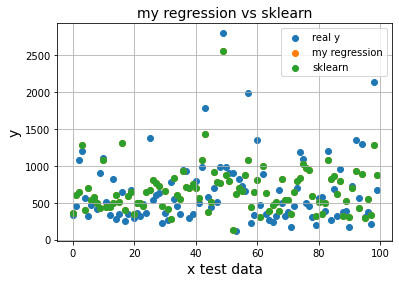

In [ ]:
plt.figure()
x_plot = test.index
range_from = 0
range_to = 100
x_plot = list(range(range_from, range_to))

plt.title('my regression vs sklearn', fontsize=14)
plt.xlabel('x test data', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.scatter(x_plot[range_from:range_to], y_test[range_from:range_to], label='real y')
plt.scatter(x_plot[range_from:range_to], y_pre[range_from:range_to], label='my regression')
plt.scatter(x_plot[range_from:range_to], y_skl[range_from:range_to], label='sklearn')
plt.legend()
plt.show()

## sklearn Linear Regression score

In [ ]:
LR.score(x_test, y_skl)

1.0

# Lasso and Ridge

## Ridge regression

In [ ]:
ridge_reg = linear_model.Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)
y_ridge = ridge_reg.predict(x_test)

In [ ]:
ridge_reg2 = linear_model.Ridge(alpha=0.5)
ridge_reg2.fit(x_train2,y_train2)
y_ridge2 = ridge_reg2.predict(x_test2)
y_ridge2

array([ 710.58372806,  865.71144974, 1625.59187977, ...,  539.97333619,
        746.36282802, 1180.58801228])

## Lasso regression

In [ ]:
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)
y_lasso = lasso_reg.predict(x_test)

In [ ]:
lasso_reg2 = linear_model.Lasso(alpha=0.1)
lasso_reg2.fit(x_train2,y_train2)
y_lasso2 = lasso_reg2.predict(x_test2)
y_lasso2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.701e+09, tolerance: 3.797e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([ 710.23045814,  865.60555611, 1625.37746239, ...,  540.10473976,
        746.65101453, 1180.56740714])

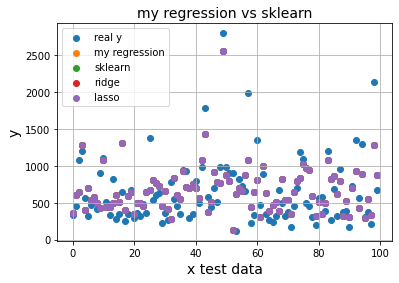

In [ ]:
plt.figure()
range_from = 0
range_to = 100
x_plot = list(range(range_from, range_to))

plt.title('my regression vs sklearn', fontsize=14)
plt.xlabel('x test data', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.scatter(x_plot, y_test[range_from:range_to], label='real y')
plt.scatter(x_plot, y_pre[range_from:range_to], label='my regression')
plt.scatter(x_plot, y_skl[range_from:range_to], label='sklearn')
plt.scatter(x_plot, y_ridge[range_from:range_to], label='ridge')
plt.scatter(x_plot, y_lasso[range_from:range_to], label='lasso')


plt.legend()
plt.show()

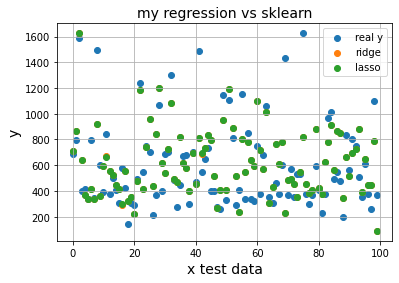

In [ ]:
plt.figure()
range_from = 0
range_to = 100
x_plot = list(range(range_from, range_to))

plt.title('my regression vs sklearn', fontsize=14)
plt.xlabel('x test data', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.scatter(x_plot, y_test2[range_from:range_to], label='real y')
# plt.scatter(x_plot, y_pre[range_from:range_to], label='my regression')
# plt.scatter(x_plot, y_skl[range_from:range_to], label='sklearn')
plt.scatter(x_plot, y_ridge2[range_from:range_to], label='ridge')
plt.scatter(x_plot, y_lasso2[range_from:range_to], label='lasso')


plt.legend()
plt.show()

In [ ]:
def mae(coef, x, y):
    return np.mean(abs(np.dot(x, coef) - y))/2
 
 

In [ ]:
c3 = multilinear_regression(coef, x_train, y_train, 1e-1, error_func=mae)


In [ ]:
y_pre3 = c3[0] + c3[1]*x_test[:, 1] + c3[2]*x_test[:, 2] + c3[3]*x_test[:, 3]
 
y_pre3

array([351.89841632, 604.74161361, 583.98258097, ..., 705.07621571,
       504.40701151, 320.460241  ])

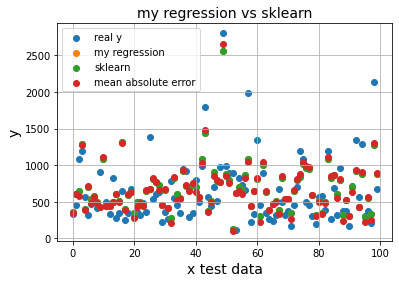

In [ ]:
plt.figure()
range_from = 0
range_to = 100
x_plot = list(range(range_from, range_to))

plt.title('my regression vs sklearn', fontsize=14)
plt.xlabel('x test data', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.scatter(x_plot, y_test[range_from:range_to], label='real y')
plt.scatter(x_plot, y_pre[range_from:range_to], label='my regression')
plt.scatter(x_plot, y_skl[range_from:range_to], label='sklearn')
plt.scatter(x_plot, y_pre3[range_from:range_to], label='mean absolute error')


plt.legend()
plt.show()